# Import Dependencies, Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sns
sns.set()
# sns.set_style("darkgrid")
sns.set_palette("husl")

In [2]:
presidential_elections = pd.read_csv('/Users/davidsiegel/Downloads/presidential_elections.csv')

In [3]:
presidential_elections.head()

,year,office,state,district,election_date,forecast_date,forecast_type,party,candidate,projected_voteshare,actual_voteshare,probwin,probwin_outcome
0,2016,President,AL,NaN,2016-11-08,2016-11-08,polls-plus,R,Trump,58.193710,62.08,0.99915,1
1,2016,President,AL,NaN,2016-11-08,2016-11-08,polls-plus,D,Clinton,35.841850,34.36,0.00085,0
2,2016,President,AL,NaN,2016-11-08,2016-11-08,polls-plus,L,Johnson,4.215338,2.09,0.00000,0
3,2016,President,AK,NaN,2016-11-08,2016-11-08,polls-plus,R,Trump,48.447200,51.28,0.78535,1
4,2016,President,AK,NaN,2016-11-08,2016-11-08,polls-plus,D,Clinton,40.652500,36.55,0.21435,0


In [4]:
forecast_month_list = []
for forecast_date in presidential_elections.forecast_date:
    forecast_month_list.append(forecast_date.split('-')[1])
presidential_elections['forecast_month']=forecast_month_list

In [5]:
presidential_elections.election_date.unique()

array(['2016-11-08', '2012-11-06', '2008-11-04'], dtype=object)

In [6]:
presidential_elections = presidential_elections[presidential_elections.election_date=='2016-11-08']

In [7]:
presidential_elections.head()

,year,office,state,district,election_date,forecast_date,forecast_type,party,candidate,projected_voteshare,actual_voteshare,probwin,probwin_outcome,forecast_month
0,2016,President,AL,NaN,2016-11-08,2016-11-08,polls-plus,R,Trump,58.193710,62.08,0.99915,1,11
1,2016,President,AL,NaN,2016-11-08,2016-11-08,polls-plus,D,Clinton,35.841850,34.36,0.00085,0,11
2,2016,President,AL,NaN,2016-11-08,2016-11-08,polls-plus,L,Johnson,4.215338,2.09,0.00000,0,11
3,2016,President,AK,NaN,2016-11-08,2016-11-08,polls-plus,R,Trump,48.447200,51.28,0.78535,1,11
4,2016,President,AK,NaN,2016-11-08,2016-11-08,polls-plus,D,Clinton,40.652500,36.55,0.21435,0,11


# Predictions by Day

In [8]:
#For a given win probability, for a given date, what are the odds that the outcome matches the probability?

#For a given date:
#Make 10 tranches of probwin, see what the probwin_outcome is.
tranche_step = 0.1
tranches = np.arange(0,1,tranche_step)
tranche_list = []
mean_probwin_list = []
median_probwin_list = []
forecast_date_list = []
mean_outcomewin_list = []
median_outcomewin_list = []
for forecast_date in presidential_elections.forecast_date.unique():
    for tranche in tranches:
        tranche_list.append(tranche)
        forecast_date_list.append(forecast_date)
        mean_probwin_list.append(np.mean(presidential_elections.probwin[(presidential_elections.forecast_date==forecast_date)&(presidential_elections.probwin>=tranche)&(presidential_elections.probwin<=tranche+tranche_step)]))
#       I use <= and >= but expect it only matters at 0 and 1, which are really the only points I care about.
#       Maybe 0.5 too.  It's an approximation.
        median_probwin_list.append(np.median(presidential_elections.probwin[(presidential_elections.forecast_date==forecast_date)&(presidential_elections.probwin>=tranche)&(presidential_elections.probwin<=tranche+tranche_step)]))
        mean_outcomewin_list.append((np.mean(presidential_elections.probwin_outcome[(presidential_elections.forecast_date==forecast_date)&(presidential_elections.probwin>=tranche)&(presidential_elections.probwin<=tranche+tranche_step)])))
        median_outcomewin_list.append((np.median(presidential_elections.probwin_outcome[(presidential_elections.forecast_date==forecast_date)&(presidential_elections.probwin>=tranche)&(presidential_elections.probwin<=tranche+tranche_step)])))

# tranche_step = 0.1
# tranches = np.arange(0,1,tranche_step)
# tranche_list = []
# mean_probwin_list = []
# median_probwin_list = []
# forecast_month_list = []
# mean_outcomewin_list = []
# median_outcomewin_list = []
# for forecast_month in presidential_elections.forecast_month.unique():
#     for tranche in tranches:
#         tranche_list.append(tranche)
#         forecast_month_list.append(int(forecast_month))
#         mean_probwin_list.append(np.mean(presidential_elections.probwin[(presidential_elections.forecast_month==forecast_month)&(presidential_elections.probwin>=tranche)&(presidential_elections.probwin<=tranche+tranche_step)]))
# #       I use <= and >= but expect it only matters at 0 and 1, which are really the only points I care about.
# #       Maybe 0.5 too.  It's an approximation.
#         median_probwin_list.append(np.median(presidential_elections.probwin[(presidential_elections.forecast_month==forecast_month)&(presidential_elections.probwin>=tranche)&(presidential_elections.probwin<=tranche+tranche_step)]))
#         mean_outcomewin_list.append((np.mean(presidential_elections.probwin_outcome[(presidential_elections.forecast_month==forecast_month)&(presidential_elections.probwin>=tranche)&(presidential_elections.probwin<=tranche+tranche_step)])))
#         median_outcomewin_list.append((np.median(presidential_elections.probwin_outcome[(presidential_elections.forecast_month==forecast_month)&(presidential_elections.probwin>=tranche)&(presidential_elections.probwin<=tranche+tranche_step)])))


summary_data = pd.DataFrame(data={'forecast_date':forecast_date_list,'tranche':tranche_list,'mean_probwin':mean_probwin_list,'median_probwin':median_probwin_list,'mean_outcomewin':mean_outcomewin_list,'median_outcomewin':median_outcomewin_list})
summary_data

,forecast_date,mean_outcomewin,mean_probwin,median_outcomewin,median_probwin,tranche
0,2016-11-08,0.000000,0.009378,0.0,0.000200,0.0
1,2016-11-08,0.166667,0.149194,0.0,0.149500,0.1
2,2016-11-08,0.470588,0.237238,0.0,0.225900,0.2
3,2016-11-08,0.000000,0.325155,0.0,0.326000,0.3
4,2016-11-08,0.600000,0.445470,1.0,0.444800,0.4
5,2016-11-08,0.400000,0.554410,0.0,0.555150,0.5
6,2016-11-08,1.000000,0.674727,1.0,0.673900,0.6
7,2016-11-08,0.529412,0.762526,1.0,0.774050,0.7
8,2016-11-08,0.833333,0.846540,1.0,0.841425,0.8
9,2016-11-08,1.000000,0.975715,1.0,0.982600,0.9


In [9]:
slope_list = []
intercept_list = []
rvalue_list = []
pvalue_list = []
stderr_list = []
date_list = []

for date in summary_data.forecast_date.unique():
#     print month
    slope,intercept,rvalue,pvalue,stderr = st.linregress(summary_data.mean_probwin[summary_data.forecast_date==date],summary_data.mean_outcomewin[summary_data.forecast_date==date])
    slope_list.append(slope)
    intercept_list.append(intercept)
    rvalue_list.append(rvalue)
    pvalue_list.append(pvalue)
    stderr_list.append(stderr)
    date_list.append(date)
#     print st.linregress(summary_data.mean_probwin[summary_data.forecast_date==date],summary_data.mean_outcomewin[summary_data.forecast_date==date])




In [10]:
day_number_list = []
for date in date_list:
    month = date.split('-')[1]
    day = date.split('-')[2]
    if int(month)==6:
        day_number_list.append(int(day))
    elif int(month)==7:
        day_number_list.append(30+int(day))
    elif int(month)==8:
        day_number_list.append(30+31+int(day))
    elif int(month)==9:
        day_number_list.append(30+31+31+int(day))
    elif int(month)==10:
        day_number_list.append(30+31+31+30+int(day))
    elif int(month)==11:
        day_number_list.append(30+31+31+30+31+int(day))

days_from_election_list = np.array(day_number_list)-(30+31+31+30+31+8)

In [11]:
len(day_number_list),len(date_list)

(154, 154)

In [12]:
days_from_election_list,date_list

(array([   0,   -1,   -2,   -3,   -4,   -5,   -6,   -7,   -8,   -9,  -10,
         -11,  -12,  -13,  -14,  -15,  -16,  -17,  -18,  -19,  -20,  -21,
         -22,  -23,  -24,  -25,  -26,  -27,  -28,  -29,  -30,  -31,  -32,
         -33,  -34,  -35,  -36,  -37,  -38,  -39,  -40,  -41,  -42,  -43,
         -44,  -45,  -46,  -47,  -48,  -49,  -50,  -51,  -52,  -53,  -54,
         -55,  -56,  -57,  -58,  -59,  -60,  -61,  -62,  -63,  -64,  -65,
         -66,  -67,  -68,  -69,  -70,  -71,  -72,  -73,  -74,  -75,  -76,
         -77,  -78,  -79,  -80,  -81,  -82,  -83,  -84,  -85,  -86,  -87,
         -88,  -89,  -90,  -91,  -92,  -93,  -94,  -95,  -96,  -97,  -98,
         -99, -100, -101, -102, -103, -104, -105, -106, -107, -108, -109,
        -110, -111, -112, -113, -114, -115, -116, -117, -118, -119, -120,
        -121, -122, -123, -124, -125, -126, -127, -128, -129, -130, -131,
        -132, -133, -134, -135, -136, -137, -138, -139, -140, -141, -142,
        -143, -144, -145, -146, -147, 

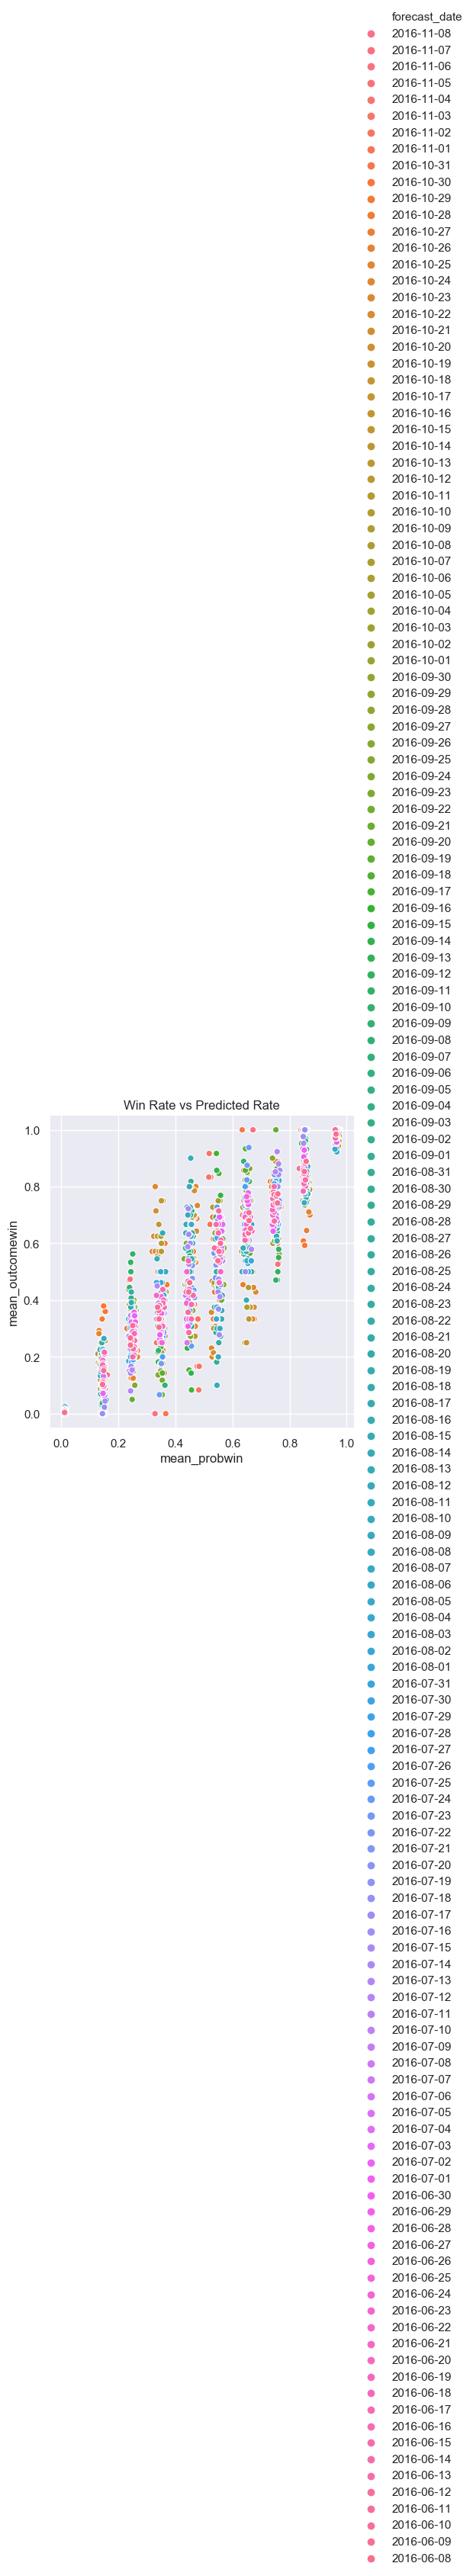

In [13]:
sns.relplot(x='mean_probwin',y='mean_outcomewin',hue='forecast_date',data=summary_data,legend='full')
plt.title('Win Rate vs Predicted Rate')
plt.show()

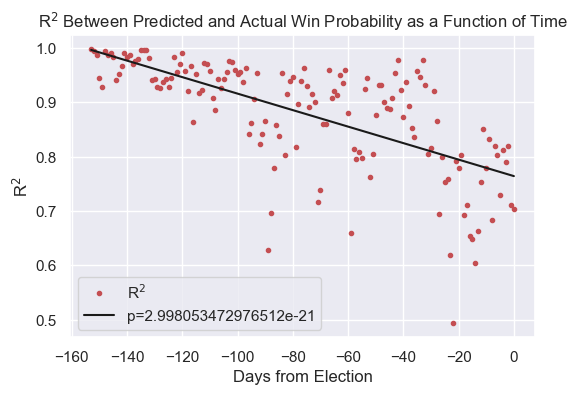

In [14]:
slope,intercept,rvalue,pvalue,stderr = st.linregress(days_from_election_list,np.array(rvalue_list)**2)
plt.plot(days_from_election_list,np.array(rvalue_list)**2,'.',label = 'R$^2$',color='r')
plt.plot(days_from_election_list,slope*np.array(days_from_election_list)+intercept,label='p='+str(pvalue),color='k')
plt.xlabel('Days from Election')
plt.ylabel('R$^2$')
plt.legend()
plt.title('R$^2$ Between Predicted and Actual Win Probability as a Function of Time')
plt.show()